<a href="https://colab.research.google.com/github/zolzayakh/Dive-into-coding/blob/main/Go_down_from_MtFuji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

csv_path = "/content/drive/MyDrive/Colab Notebooks/mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


**[Problem 1] Data visualization**

Text(0, 0.5, 'Elevation in meter')

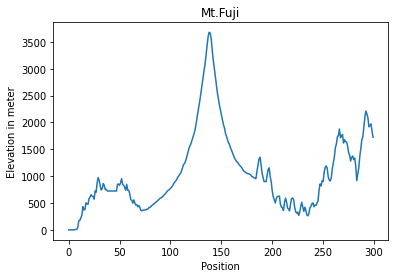

In [3]:
import matplotlib.pyplot as plt
plt.plot(fuji[:, 0], fuji[:, 3]) 
plt.title("Mt.Fuji")
plt.xlabel("Position")
plt.ylabel("Elevation in meter")

**[Problem 2] Create a function to calculate the gradient at a certain point**

In [4]:
def gradient_at_point(point):
  dx = fuji[point, 0] - fuji[point-1, 0]
  dy = fuji[point, 3] - fuji[point-1, 3]
  gradient = dy/dx
  return(gradient)
 
p = gradient_at_point(10) 
print(p)

117.15


**[Problem 3] Create a function to calculate the destination point**

In [5]:
def destination_point(cur_point, alpha):
  destination_p = cur_point - alpha*gradient_at_point(cur_point)
  return(destination_p)

destination_point(100, 0.2)

96.21999999999998

**[Problem 4] Create a function to go down the mountain**

In [6]:
def goes_down(cur_point, alpha):
  goes_down_list =[]
  while cur_point > 0:
    goes_down_list.append(destination_point(cur_point, alpha))
    cur_point = cur_point - 1
    if cur_point == 0:
      break
  return(goes_down_list)

points = goes_down(136, 0.2)
points = [int(x) for x in points]
print(points)

[102, 99, 110, 104, 107, 103, 102, 105, 105, 102, 101, 104, 110, 111, 108, 108, 112, 107, 102, 103, 102, 104, 109, 102, 99, 101, 104, 102, 102, 98, 101, 99, 98, 94, 97, 96, 96, 96, 94, 91, 90, 92, 88, 89, 89, 88, 87, 84, 84, 83, 83, 81, 80, 80, 78, 76, 79, 73, 77, 75, 74, 74, 73, 70, 73, 80, 78, 64, 76, 65, 74, 76, 51, 73, 64, 82, 72, 59, 80, 35, 66, 63, 57, 74, 37, 41, 54, 49, 22, 47, 46, 45, 44, 43, 42, 41, 40, 39, 44, 35, 51, 42, 15, 27, 46, 51, 41, 9, -7, 31, -4, 35, 24, 28, 13, 14, 0, 20, 21, -7, 14, 27, -17, 3, 1, 9, -13, 0, 7, 6, 4, 5, 4, 3, 2, 1]


[**Problem 5] Visualization of the descent process**

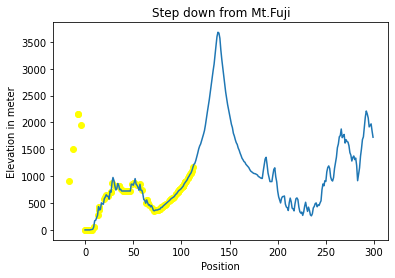

In [7]:
import matplotlib.pyplot as plt
plt.plot(fuji[:, 0], fuji[:, 3])
plt.scatter(points, fuji[points, 3], c='yellow')
plt.title("Step down from Mt.Fuji")
plt.xlabel("Position")
plt.ylabel("Elevation in meter")
plt.show()

**[Problem 6] Change of initial value**

In [8]:
points6 = goes_down(142, 0.2)
points6 = [int(x) for x in points6]
print(points6)

[177, 184, 159, 142, 122, 103, 102, 99, 110, 104, 107, 103, 102, 105, 105, 102, 101, 104, 110, 111, 108, 108, 112, 107, 102, 103, 102, 104, 109, 102, 99, 101, 104, 102, 102, 98, 101, 99, 98, 94, 97, 96, 96, 96, 94, 91, 90, 92, 88, 89, 89, 88, 87, 84, 84, 83, 83, 81, 80, 80, 78, 76, 79, 73, 77, 75, 74, 74, 73, 70, 73, 80, 78, 64, 76, 65, 74, 76, 51, 73, 64, 82, 72, 59, 80, 35, 66, 63, 57, 74, 37, 41, 54, 49, 22, 47, 46, 45, 44, 43, 42, 41, 40, 39, 44, 35, 51, 42, 15, 27, 46, 51, 41, 9, -7, 31, -4, 35, 24, 28, 13, 14, 0, 20, 21, -7, 14, 27, -17, 3, 1, 9, -13, 0, 7, 6, 4, 5, 4, 3, 2, 1]


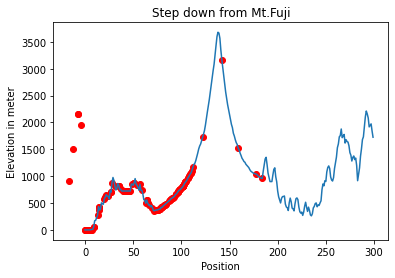

In [9]:
plt.plot(fuji[:, 0], fuji[:, 3])
plt.scatter(points6, fuji[points6, 3], c='red')
plt.title("Step down from Mt.Fuji")
plt.xlabel("Position")
plt.ylabel("Elevation in meter")
plt.show()

**[Problem 7] Visualization of the descent process for each initial value**

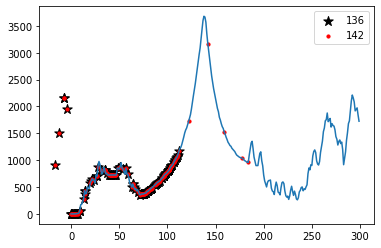

In [10]:
plt.plot(fuji[:, 0], fuji[:, 3])
plt.scatter(points, fuji[points, 3], c='black', s=100, marker='*', label='136')
plt.scatter(points6, fuji[points6, 3], c='red', s=10, label = '142')
plt.legend()
plt.show()

**[Problem 8] (Advance problem) Hyperparameter changes**

In [11]:
for l in [0.1, 0.01, 0.001, 0.0001]:
  print(l)
  points = goes_down(136, l)
  points = [int(x) for x in points]
  print(points)



0.1
[119, 117, 122, 118, 119, 117, 116, 117, 116, 114, 113, 114, 117, 117, 115, 114, 116, 113, 110, 110, 109, 109, 111, 107, 105, 106, 107, 105, 105, 102, 103, 102, 101, 98, 99, 98, 98, 97, 96, 94, 93, 93, 91, 91, 90, 89, 88, 86, 86, 85, 84, 83, 82, 81, 80, 78, 79, 76, 77, 76, 75, 74, 73, 71, 72, 75, 74, 66, 72, 66, 70, 70, 57, 68, 63, 71, 66, 59, 69, 46, 61, 59, 55, 63, 44, 46, 52, 49, 35, 47, 46, 45, 44, 43, 42, 41, 40, 39, 41, 36, 43, 38, 24, 30, 39, 41, 35, 19, 10, 29, 10, 30, 24, 25, 17, 17, 9, 19, 19, 4, 15, 21, -1, 8, 6, 10, -1, 4, 7, 6, 5, 5, 4, 3, 2, 1]
0.01
[134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 72, 71, 70, 68, 68, 66, 66, 65, 63, 63, 62, 62, 60, 59, 59, 55, 56, 55, 54, 54, 51, 50, 50, 49, 46, 47, 46, 45, 44, 43, 42, 41, 40, 3